<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png"
     width="200px"
     height="auto"/>
</p>



# <h1 align="center" id="heading">Phase I - Proof of Concept</h1>



## ☑️ Objectives
At the end of this session, you will have a brief understanding of how to:
- [ ] Find and run pre-trained models (Phase I)
- [ ] Evaluate results from pre-trained models (Phase I)
- [ ] Run a pre-trained model using real Reddit data (Phase I)


## 🛠️ Pre-Assignment
1. Create a virtual environment with 🐍 conda : `conda env create -f environment.yml`

2. Activate your conda virtual environment: `conda activate tsla_bot`

3. Create a .env file in the root directory and add the following variables:
4. 
   `STOCK_API_KEY` : API key from [twelvedata](https://twelvedata.com/pricing)

   `REDDIT_API_CLIENT_ID` : client ID of your reddit app
   
   `REDDIT_API_CLIENT_SECRET`: client secret of your reddit app
   
   Follow this tutorial to generate your own Reddit credentials:
   <https://www.jcchouinard.com/get-reddit-api-credentials-with-praw/>

4. Continue in this notebook



## Background


After the meeting with your boss, and reviewing your [notes](https://www.notion.so/Analyzing-Market-Sentiment-Phase-I-II-and-II-End-to-End-MLOps-with-Open-Source-Tools-dc4b846108b44f6bb2962d550368560c#54cc350bc95041ee873dabde36930af1) 📓, you're ready to get going on a Proof of Concept (POC)

A POC tests the validity of your hypothesis. It's a way to prove that your idea, task, app, or whatever else works!

There's no time to waste - you've got an idea - it's time to get testing it out! 🏁

### Step 1: Initial Imports and Variable Setting 📈

First things first: Let's set some variables that will help us going forward.

Though your boss suggested `"TSLA"`, you can use any active stock-symbol and subreddit!

**IMPORTANT**: Make sure you verify that your selected subreddit exists by navigating to the generated link after you run the following cell

In [1]:
from datetime import datetime, timedelta

### START CODE HERE

# Stock data to grab ex. "TSLA"
symbol = "TSLA"

# subreddit to check
subreddit = 'TSLA'

# Time interval granularity
# valid choices are "1week", "1month", "1day"
interval = '1day'

# set the beginning and end of the time range you'd like to analyze
# ensure you use the format "YYYY-MM-DD"
start_date = "2022-03-07"
end_date = "2022-07-08"

### END CODE HERE

start_date_dt = datetime.strptime(start_date, '%Y-%m-%d')
end_date_dt = datetime.strptime(end_date, '%Y-%m-%d')

print(f'reddit.com/r/{subreddit}')

reddit.com/r/TSLA


In order to make sure we can import our `BotUtils.py`, we have to ensure we're running from the `TSLASentimentAnalyzer` folder. To do this, we can `cd` into that directory!

In [2]:
#%cd "TSLASentimentAnalyzer"
#%pwd 
%cd "TSLASentimentAnalyzer"



/Users/nehatarey/mlops-course/phases/code/ml-ops-sentiment/Week_1-Open_Source_ML_POC_and_App_Builds/Phase_I-Proof_of_concept/TSLASentimentAnalyzer


### Step 2: Set Environment Variables ⛰️

Use the information you created in the instructions of the `README.md` to fill in the values below!

In [3]:
%pwd

'/Users/nehatarey/mlops-course/phases/code/ml-ops-sentiment/Week_1-Open_Source_ML_POC_and_App_Builds/Phase_I-Proof_of_concept/TSLASentimentAnalyzer'

In [4]:
import os
with open(".env", "r") as env_file:
    #print(env_file.read())
    for line in env_file:
        key, value = line.strip().split(":")
        if key and value:
            os.environ[key] = value

In [5]:
# define env variables for configuration
import os
#import 
os.environ['REDDIT_API_CLIENT_ID'] = os.environ['REDDIT_API_CLIENT_ID']
os.environ['REDDIT_API_CLIENT_SECRET'] = os.environ['REDDIT_API_CLIENT_SECRET']
os.environ['STOCK_DATA_API_KEY'] = os.environ['STOCK_API_KEY']


### Step 3: Get to Scraping 🌐

Now we're going to use the `scraper` module (found in the `TSLASentimentAnalyzer` folder) to "scrape" the subreddit of our choosing for posts!

⚗️ RESOURCES: 

[Web Scraping](https://www.parsehub.com/blog/what-is-web-scraping/)

[Reddit Post Options](https://www.reddit.com/r/help/comments/32eu8w/what_is_the_difference_between_newrising_hot_top/)

##### Initializing the Scraper

In [6]:
%pwd

'/Users/nehatarey/mlops-course/phases/code/ml-ops-sentiment/Week_1-Open_Source_ML_POC_and_App_Builds/Phase_I-Proof_of_concept/TSLASentimentAnalyzer'

In [7]:
%cd "TSLASentimentAnalyzer"

[Errno 2] No such file or directory: 'TSLASentimentAnalyzer'
/Users/nehatarey/mlops-course/phases/code/ml-ops-sentiment/Week_1-Open_Source_ML_POC_and_App_Builds/Phase_I-Proof_of_concept/TSLASentimentAnalyzer


In [8]:
import pandas as pd
from loguru import logger
from TSLASentimentAnalyzer.classifier import predict
from TSLASentimentAnalyzer.scraper import RedditScraper
from TSLASentimentAnalyzer.config import settings


# instantiating the reddit scraper
reddit = RedditScraper('teslainvestorsclub')
#print(reddit.subreddit.top(limit=10))
#print(settings)

##### Helper Functions 🔨

Here are some helper functions to assist in collecting data!

In [9]:
from collections.abc import Callable

def load_comments(number: int, scraping_option: Callable) -> pd.DataFrame:
    '''
    loads comments from reddit using the RedditScraper using one of the options
    and returns a DataFrame

    Parameters
    ----------
    number : int
        number of posts to load comments from

    scraping_options: callable
        expects a select_scrap_type function
    '''
    comments = []
    for submission in scraping_option(number):
        comments.extend(reddit.get_comment_forest(submission.comments))
        print(comments)
        logger.debug(
            submission.title,
            submission.num_comments,
            len(reddit.get_comment_forest(submission.comments)),
        )
    df = pd.DataFrame(comments)
    return df


def select_scrap_type(option: str) -> Callable:
    '''
    selects a method from the reddit object based on a given option
    '''
    if option == "Hot":
        return reddit.get_hot
        
    if option == "Rising":
        return reddit.get_rising

    if option == "New":
        return reddit.get_new

##### Loading & Processing the Reddit Comment Data

Let's scrape the 15 🔥 hottest 🔥 posts from your selected subreddit using the `load_data()` helper function!

In [10]:
# Scraping data from reddit
select_scrap_type("Hot")
dfReddit = load_comments(15, select_scrap_type("Hot"))

2022-07-11 01:00:44.464 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff433924b20>
2022-07-11 01:00:44.468 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff433924b20>
2022-07-11 01:00:44.470 | DEBUG    | __main__:load_comments:20 - Daily Thread - July 10, 2022


[{'comment': 'The ominous remark:" Factories want to go bankrupt.... They are giant money burning furnaces...."\n\nWell this is TRUE FOR EVERY OEM. Guess what is going to happen with decreasing LICE sales...\n\nEven Bloomberg, JP Morgan and BI may start noticing it by the end of the year...\n\nMy personal Dead Poll call for Honda not being an independent business anymore by 2025...', 'title': 'Daily Thread - July 10, 2022', 'id': 'iflq7wy', 'created_at': 1657465557, 'score': 12}, {'comment': 'https://twitter.com/elonmusk/status/1546344529460174849?t=9TXcWOAn7nO3fBRYb7g2Mg\n\nhttps://twitter.com/elonmusk/status/1546345773348147201?t=nGAxUj31vAixaYKCdDr2UA', 'title': 'Daily Thread - July 10, 2022', 'id': 'ifolql9', 'created_at': 1657512837, 'score': 1}, {'comment': 'heard a snippet on Bloomberg about how UBER drivers should be feeling gas prices, but with the Hertz deal, Uber drivers can rent a Tesla for $350 a week insured and the program is highly successful. The talking head then went

2022-07-11 01:00:57.255 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff4339d0f70>
2022-07-11 01:00:57.256 | INFO     | TSLASentimentAnalyzer.scraper:get_comment_forest:44 - more comments
2022-07-11 01:01:07.310 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <MoreComments count=1, children=['i7h9jhn']>
2022-07-11 01:01:07.311 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:45 - [{'comment': "Walked right into that one, no?  Where, precisely, was the government impeding anyone's speech on Twitter?  No government censorship then it ain't a free speech matter.  It's a consequence-of-being-an-asshat-matter, just as it is for those thinking hate speech is permissible.  See also: paradox of tolerance.", 'title': 'Long-running Thread for Detailed Discussion', 'id': 'i7h9jhn', 'created_at': 1651787094, 'score': 1}]
2022-07-11 01:01:07.313 | INFO     | TSLASentimentAnalyzer.scraper:get_

[{'comment': 'The ominous remark:" Factories want to go bankrupt.... They are giant money burning furnaces...."\n\nWell this is TRUE FOR EVERY OEM. Guess what is going to happen with decreasing LICE sales...\n\nEven Bloomberg, JP Morgan and BI may start noticing it by the end of the year...\n\nMy personal Dead Poll call for Honda not being an independent business anymore by 2025...', 'title': 'Daily Thread - July 10, 2022', 'id': 'iflq7wy', 'created_at': 1657465557, 'score': 12}, {'comment': 'https://twitter.com/elonmusk/status/1546344529460174849?t=9TXcWOAn7nO3fBRYb7g2Mg\n\nhttps://twitter.com/elonmusk/status/1546345773348147201?t=nGAxUj31vAixaYKCdDr2UA', 'title': 'Daily Thread - July 10, 2022', 'id': 'ifolql9', 'created_at': 1657512837, 'score': 1}, {'comment': 'heard a snippet on Bloomberg about how UBER drivers should be feeling gas prices, but with the Hertz deal, Uber drivers can rent a Tesla for $350 a week insured and the program is highly successful. The talking head then went

2022-07-11 01:02:39.151 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff4340a2b20>
2022-07-11 01:02:39.158 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff4340a2b20>
2022-07-11 01:02:39.159 | DEBUG    | __main__:load_comments:20 - Understanding Tesla’s operating leverage


[{'comment': 'The ominous remark:" Factories want to go bankrupt.... They are giant money burning furnaces...."\n\nWell this is TRUE FOR EVERY OEM. Guess what is going to happen with decreasing LICE sales...\n\nEven Bloomberg, JP Morgan and BI may start noticing it by the end of the year...\n\nMy personal Dead Poll call for Honda not being an independent business anymore by 2025...', 'title': 'Daily Thread - July 10, 2022', 'id': 'iflq7wy', 'created_at': 1657465557, 'score': 12}, {'comment': 'https://twitter.com/elonmusk/status/1546344529460174849?t=9TXcWOAn7nO3fBRYb7g2Mg\n\nhttps://twitter.com/elonmusk/status/1546345773348147201?t=nGAxUj31vAixaYKCdDr2UA', 'title': 'Daily Thread - July 10, 2022', 'id': 'ifolql9', 'created_at': 1657512837, 'score': 1}, {'comment': 'heard a snippet on Bloomberg about how UBER drivers should be feeling gas prices, but with the Hertz deal, Uber drivers can rent a Tesla for $350 a week insured and the program is highly successful. The talking head then went

2022-07-11 01:02:49.449 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff43418b040>
2022-07-11 01:02:49.458 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff43418b040>
2022-07-11 01:02:49.459 | DEBUG    | __main__:load_comments:20 - Why Electric Vehicle Manufacturing Is A National Security Imperative - IBT 7.10.22


[{'comment': 'The ominous remark:" Factories want to go bankrupt.... They are giant money burning furnaces...."\n\nWell this is TRUE FOR EVERY OEM. Guess what is going to happen with decreasing LICE sales...\n\nEven Bloomberg, JP Morgan and BI may start noticing it by the end of the year...\n\nMy personal Dead Poll call for Honda not being an independent business anymore by 2025...', 'title': 'Daily Thread - July 10, 2022', 'id': 'iflq7wy', 'created_at': 1657465557, 'score': 12}, {'comment': 'https://twitter.com/elonmusk/status/1546344529460174849?t=9TXcWOAn7nO3fBRYb7g2Mg\n\nhttps://twitter.com/elonmusk/status/1546345773348147201?t=nGAxUj31vAixaYKCdDr2UA', 'title': 'Daily Thread - July 10, 2022', 'id': 'ifolql9', 'created_at': 1657512837, 'score': 1}, {'comment': 'heard a snippet on Bloomberg about how UBER drivers should be feeling gas prices, but with the Hertz deal, Uber drivers can rent a Tesla for $350 a week insured and the program is highly successful. The talking head then went

2022-07-11 01:02:59.705 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff43418d820>
2022-07-11 01:02:59.712 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff43418d820>
2022-07-11 01:02:59.713 | DEBUG    | __main__:load_comments:20 - Tesla Model Y Is China’s Best-Selling SUV in June, Smashing Rivals


[{'comment': 'The ominous remark:" Factories want to go bankrupt.... They are giant money burning furnaces...."\n\nWell this is TRUE FOR EVERY OEM. Guess what is going to happen with decreasing LICE sales...\n\nEven Bloomberg, JP Morgan and BI may start noticing it by the end of the year...\n\nMy personal Dead Poll call for Honda not being an independent business anymore by 2025...', 'title': 'Daily Thread - July 10, 2022', 'id': 'iflq7wy', 'created_at': 1657465557, 'score': 12}, {'comment': 'https://twitter.com/elonmusk/status/1546344529460174849?t=9TXcWOAn7nO3fBRYb7g2Mg\n\nhttps://twitter.com/elonmusk/status/1546345773348147201?t=nGAxUj31vAixaYKCdDr2UA', 'title': 'Daily Thread - July 10, 2022', 'id': 'ifolql9', 'created_at': 1657512837, 'score': 1}, {'comment': 'heard a snippet on Bloomberg about how UBER drivers should be feeling gas prices, but with the Hertz deal, Uber drivers can rent a Tesla for $350 a week insured and the program is highly successful. The talking head then went

2022-07-11 01:03:09.991 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff4341923d0>
2022-07-11 01:03:09.998 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff4341923d0>
2022-07-11 01:03:09.999 | DEBUG    | __main__:load_comments:20 - US Crosses the Electric-Car Tipping Point for Mass Adoption


[{'comment': 'The ominous remark:" Factories want to go bankrupt.... They are giant money burning furnaces...."\n\nWell this is TRUE FOR EVERY OEM. Guess what is going to happen with decreasing LICE sales...\n\nEven Bloomberg, JP Morgan and BI may start noticing it by the end of the year...\n\nMy personal Dead Poll call for Honda not being an independent business anymore by 2025...', 'title': 'Daily Thread - July 10, 2022', 'id': 'iflq7wy', 'created_at': 1657465557, 'score': 12}, {'comment': 'https://twitter.com/elonmusk/status/1546344529460174849?t=9TXcWOAn7nO3fBRYb7g2Mg\n\nhttps://twitter.com/elonmusk/status/1546345773348147201?t=nGAxUj31vAixaYKCdDr2UA', 'title': 'Daily Thread - July 10, 2022', 'id': 'ifolql9', 'created_at': 1657512837, 'score': 1}, {'comment': 'heard a snippet on Bloomberg about how UBER drivers should be feeling gas prices, but with the Hertz deal, Uber drivers can rent a Tesla for $350 a week insured and the program is highly successful. The talking head then went

2022-07-11 01:03:20.310 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff43419f880>
2022-07-11 01:03:20.320 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff43419f880>
2022-07-11 01:03:20.321 | DEBUG    | __main__:load_comments:20 - Mazda reports just 23 sales of their all-electric MX-30 in June 2022


[{'comment': 'The ominous remark:" Factories want to go bankrupt.... They are giant money burning furnaces...."\n\nWell this is TRUE FOR EVERY OEM. Guess what is going to happen with decreasing LICE sales...\n\nEven Bloomberg, JP Morgan and BI may start noticing it by the end of the year...\n\nMy personal Dead Poll call for Honda not being an independent business anymore by 2025...', 'title': 'Daily Thread - July 10, 2022', 'id': 'iflq7wy', 'created_at': 1657465557, 'score': 12}, {'comment': 'https://twitter.com/elonmusk/status/1546344529460174849?t=9TXcWOAn7nO3fBRYb7g2Mg\n\nhttps://twitter.com/elonmusk/status/1546345773348147201?t=nGAxUj31vAixaYKCdDr2UA', 'title': 'Daily Thread - July 10, 2022', 'id': 'ifolql9', 'created_at': 1657512837, 'score': 1}, {'comment': 'heard a snippet on Bloomberg about how UBER drivers should be feeling gas prices, but with the Hertz deal, Uber drivers can rent a Tesla for $350 a week insured and the program is highly successful. The talking head then went

2022-07-11 01:03:30.523 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff4341bb5e0>
2022-07-11 01:03:30.559 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff4341bb5e0>
2022-07-11 01:03:30.619 | DEBUG    | __main__:load_comments:20 - Cruise’s Robot Car Outages Are Jamming Up San Francisco


[{'comment': 'The ominous remark:" Factories want to go bankrupt.... They are giant money burning furnaces...."\n\nWell this is TRUE FOR EVERY OEM. Guess what is going to happen with decreasing LICE sales...\n\nEven Bloomberg, JP Morgan and BI may start noticing it by the end of the year...\n\nMy personal Dead Poll call for Honda not being an independent business anymore by 2025...', 'title': 'Daily Thread - July 10, 2022', 'id': 'iflq7wy', 'created_at': 1657465557, 'score': 12}, {'comment': 'https://twitter.com/elonmusk/status/1546344529460174849?t=9TXcWOAn7nO3fBRYb7g2Mg\n\nhttps://twitter.com/elonmusk/status/1546345773348147201?t=nGAxUj31vAixaYKCdDr2UA', 'title': 'Daily Thread - July 10, 2022', 'id': 'ifolql9', 'created_at': 1657512837, 'score': 1}, {'comment': 'heard a snippet on Bloomberg about how UBER drivers should be feeling gas prices, but with the Hertz deal, Uber drivers can rent a Tesla for $350 a week insured and the program is highly successful. The talking head then went

2022-07-11 01:03:40.895 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff4341cbdf0>
2022-07-11 01:03:40.896 | INFO     | TSLASentimentAnalyzer.scraper:get_comment_forest:44 - more comments
2022-07-11 01:03:51.023 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <MoreComments count=1, children=['iflx8f4']>
2022-07-11 01:03:51.024 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:45 - [{'comment': 'Thanks for leaving this up even though it’s not directly Tesla related. These types of videos give me confidence in his technical leadership.', 'title': "Elon Musk Explains SpaceX's Raptor Engine!", 'id': 'iflx8f4', 'created_at': 1657468604, 'score': 3}]
2022-07-11 01:03:51.033 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff4341cbdf0>
2022-07-11 01:03:51.036 | INFO     | TSLASentimentAnalyzer.scraper:get_comment_fo

[{'comment': 'The ominous remark:" Factories want to go bankrupt.... They are giant money burning furnaces...."\n\nWell this is TRUE FOR EVERY OEM. Guess what is going to happen with decreasing LICE sales...\n\nEven Bloomberg, JP Morgan and BI may start noticing it by the end of the year...\n\nMy personal Dead Poll call for Honda not being an independent business anymore by 2025...', 'title': 'Daily Thread - July 10, 2022', 'id': 'iflq7wy', 'created_at': 1657465557, 'score': 12}, {'comment': 'https://twitter.com/elonmusk/status/1546344529460174849?t=9TXcWOAn7nO3fBRYb7g2Mg\n\nhttps://twitter.com/elonmusk/status/1546345773348147201?t=nGAxUj31vAixaYKCdDr2UA', 'title': 'Daily Thread - July 10, 2022', 'id': 'ifolql9', 'created_at': 1657512837, 'score': 1}, {'comment': 'heard a snippet on Bloomberg about how UBER drivers should be feeling gas prices, but with the Hertz deal, Uber drivers can rent a Tesla for $350 a week insured and the program is highly successful. The talking head then went

2022-07-11 01:04:01.189 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff4341cbfa0>
2022-07-11 01:04:01.197 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff4341cbfa0>
2022-07-11 01:04:01.201 | DEBUG    | __main__:load_comments:20 - More Americans Would Buy an Electric Vehicle, and Some Consumers Would Use Low-Carbon Fuels, Survey Shows (Consumer Reports)


[{'comment': 'The ominous remark:" Factories want to go bankrupt.... They are giant money burning furnaces...."\n\nWell this is TRUE FOR EVERY OEM. Guess what is going to happen with decreasing LICE sales...\n\nEven Bloomberg, JP Morgan and BI may start noticing it by the end of the year...\n\nMy personal Dead Poll call for Honda not being an independent business anymore by 2025...', 'title': 'Daily Thread - July 10, 2022', 'id': 'iflq7wy', 'created_at': 1657465557, 'score': 12}, {'comment': 'https://twitter.com/elonmusk/status/1546344529460174849?t=9TXcWOAn7nO3fBRYb7g2Mg\n\nhttps://twitter.com/elonmusk/status/1546345773348147201?t=nGAxUj31vAixaYKCdDr2UA', 'title': 'Daily Thread - July 10, 2022', 'id': 'ifolql9', 'created_at': 1657512837, 'score': 1}, {'comment': 'heard a snippet on Bloomberg about how UBER drivers should be feeling gas prices, but with the Hertz deal, Uber drivers can rent a Tesla for $350 a week insured and the program is highly successful. The talking head then went

2022-07-11 01:04:11.368 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff447a8a820>
2022-07-11 01:04:11.375 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff447a8a820>
2022-07-11 01:04:11.376 | DEBUG    | __main__:load_comments:20 - Geely Is Launching Satellites in a Bid to Bring Driverless Cars to China


[{'comment': 'The ominous remark:" Factories want to go bankrupt.... They are giant money burning furnaces...."\n\nWell this is TRUE FOR EVERY OEM. Guess what is going to happen with decreasing LICE sales...\n\nEven Bloomberg, JP Morgan and BI may start noticing it by the end of the year...\n\nMy personal Dead Poll call for Honda not being an independent business anymore by 2025...', 'title': 'Daily Thread - July 10, 2022', 'id': 'iflq7wy', 'created_at': 1657465557, 'score': 12}, {'comment': 'https://twitter.com/elonmusk/status/1546344529460174849?t=9TXcWOAn7nO3fBRYb7g2Mg\n\nhttps://twitter.com/elonmusk/status/1546345773348147201?t=nGAxUj31vAixaYKCdDr2UA', 'title': 'Daily Thread - July 10, 2022', 'id': 'ifolql9', 'created_at': 1657512837, 'score': 1}, {'comment': 'heard a snippet on Bloomberg about how UBER drivers should be feeling gas prices, but with the Hertz deal, Uber drivers can rent a Tesla for $350 a week insured and the program is highly successful. The talking head then went

2022-07-11 01:04:23.134 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff447a8b700>
2022-07-11 01:04:23.136 | INFO     | TSLASentimentAnalyzer.scraper:get_comment_forest:44 - more comments
2022-07-11 01:04:33.423 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <MoreComments count=0, children=[]>
2022-07-11 01:04:33.424 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:45 - [{'comment': "That's such a sad excuse.\n\nIf you have been defrauded since day one you have no clue what the actual results should be like.\n\nImagine being underpaid since you were hired. You are obviously happy since you haven't quit your job but that doesn't mean you are gonna like it when you find out you have been underpaid.\n\nAnd people are suing all the time when they find out.", 'title': 'Elon Musk terminates $44 bln Twitter deal', 'id': 'ifhh2sx', 'created_at': 1657381418, 'score': 2}, {'comment': "Fra

[{'comment': 'The ominous remark:" Factories want to go bankrupt.... They are giant money burning furnaces...."\n\nWell this is TRUE FOR EVERY OEM. Guess what is going to happen with decreasing LICE sales...\n\nEven Bloomberg, JP Morgan and BI may start noticing it by the end of the year...\n\nMy personal Dead Poll call for Honda not being an independent business anymore by 2025...', 'title': 'Daily Thread - July 10, 2022', 'id': 'iflq7wy', 'created_at': 1657465557, 'score': 12}, {'comment': 'https://twitter.com/elonmusk/status/1546344529460174849?t=9TXcWOAn7nO3fBRYb7g2Mg\n\nhttps://twitter.com/elonmusk/status/1546345773348147201?t=nGAxUj31vAixaYKCdDr2UA', 'title': 'Daily Thread - July 10, 2022', 'id': 'ifolql9', 'created_at': 1657512837, 'score': 1}, {'comment': 'heard a snippet on Bloomberg about how UBER drivers should be feeling gas prices, but with the Hertz deal, Uber drivers can rent a Tesla for $350 a week insured and the program is highly successful. The talking head then went

2022-07-11 01:05:14.498 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff447a8ba30>
2022-07-11 01:05:14.509 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff447a8ba30>
2022-07-11 01:05:14.510 | DEBUG    | __main__:load_comments:20 - Tesla Appoints its China Executive to the Asia Pacific as Local Team Has Proven Exceptional Professionalism


[{'comment': 'The ominous remark:" Factories want to go bankrupt.... They are giant money burning furnaces...."\n\nWell this is TRUE FOR EVERY OEM. Guess what is going to happen with decreasing LICE sales...\n\nEven Bloomberg, JP Morgan and BI may start noticing it by the end of the year...\n\nMy personal Dead Poll call for Honda not being an independent business anymore by 2025...', 'title': 'Daily Thread - July 10, 2022', 'id': 'iflq7wy', 'created_at': 1657465557, 'score': 12}, {'comment': 'https://twitter.com/elonmusk/status/1546344529460174849?t=9TXcWOAn7nO3fBRYb7g2Mg\n\nhttps://twitter.com/elonmusk/status/1546345773348147201?t=nGAxUj31vAixaYKCdDr2UA', 'title': 'Daily Thread - July 10, 2022', 'id': 'ifolql9', 'created_at': 1657512837, 'score': 1}, {'comment': 'heard a snippet on Bloomberg about how UBER drivers should be feeling gas prices, but with the Hertz deal, Uber drivers can rent a Tesla for $350 a week insured and the program is highly successful. The talking head then went

2022-07-11 01:05:22.083 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff433f62fd0>
2022-07-11 01:05:22.094 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff433f62fd0>
2022-07-11 01:05:22.095 | DEBUG    | __main__:load_comments:20 - Daily Thread - July 09, 2022


[{'comment': 'The ominous remark:" Factories want to go bankrupt.... They are giant money burning furnaces...."\n\nWell this is TRUE FOR EVERY OEM. Guess what is going to happen with decreasing LICE sales...\n\nEven Bloomberg, JP Morgan and BI may start noticing it by the end of the year...\n\nMy personal Dead Poll call for Honda not being an independent business anymore by 2025...', 'title': 'Daily Thread - July 10, 2022', 'id': 'iflq7wy', 'created_at': 1657465557, 'score': 12}, {'comment': 'https://twitter.com/elonmusk/status/1546344529460174849?t=9TXcWOAn7nO3fBRYb7g2Mg\n\nhttps://twitter.com/elonmusk/status/1546345773348147201?t=nGAxUj31vAixaYKCdDr2UA', 'title': 'Daily Thread - July 10, 2022', 'id': 'ifolql9', 'created_at': 1657512837, 'score': 1}, {'comment': 'heard a snippet on Bloomberg about how UBER drivers should be feeling gas prices, but with the Hertz deal, Uber drivers can rent a Tesla for $350 a week insured and the program is highly successful. The talking head then went

2022-07-11 01:05:26.186 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff434534c10>
2022-07-11 01:05:26.197 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7ff434534c10>
2022-07-11 01:05:26.201 | DEBUG    | __main__:load_comments:20 - Tesla brings back trade-in estimate tool, but for US markets only


[{'comment': 'The ominous remark:" Factories want to go bankrupt.... They are giant money burning furnaces...."\n\nWell this is TRUE FOR EVERY OEM. Guess what is going to happen with decreasing LICE sales...\n\nEven Bloomberg, JP Morgan and BI may start noticing it by the end of the year...\n\nMy personal Dead Poll call for Honda not being an independent business anymore by 2025...', 'title': 'Daily Thread - July 10, 2022', 'id': 'iflq7wy', 'created_at': 1657465557, 'score': 12}, {'comment': 'https://twitter.com/elonmusk/status/1546344529460174849?t=9TXcWOAn7nO3fBRYb7g2Mg\n\nhttps://twitter.com/elonmusk/status/1546345773348147201?t=nGAxUj31vAixaYKCdDr2UA', 'title': 'Daily Thread - July 10, 2022', 'id': 'ifolql9', 'created_at': 1657512837, 'score': 1}, {'comment': 'heard a snippet on Bloomberg about how UBER drivers should be feeling gas prices, but with the Hertz deal, Uber drivers can rent a Tesla for $350 a week insured and the program is highly successful. The talking head then went

Once we have our comments, let's use the [`pandas.Series.str.slice()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice.html) method to ensure our data will play nicely with our model. (`bert` only supports up to a maximum of 512 tokens, so a range of `0` to `512` seems appropriate)

In [11]:
# slice comments as bert supports only 512 tokens
dfReddit['comment'] = dfReddit['comment'].str.slice(0,1000)### YOUR LINE OF CODE HERE

### Step 5: Analyze the Comments! 🔍


We'll be using the `FourthBrain/bert_model_reddit_tsla` model (found [here](https://huggingface.co/FourthBrain/bert_model_reddit_tsla)), which is based off of the `distilbert-base-uncased` (found [here](https://huggingface.co/distilbert-base-uncased))

We'll use this model in a `sentiment-analysis` pipeline! (read all about that [here](https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.pipeline.example))

In [12]:
%pwd

'/Users/nehatarey/mlops-course/phases/code/ml-ops-sentiment/Week_1-Open_Source_ML_POC_and_App_Builds/Phase_I-Proof_of_concept/TSLASentimentAnalyzer'

In [13]:
from transformers import pipeline

# initialize the sentiment pipeline
sentiment_pipeline = pipeline('sentiment-analysis', 'FourthBrain/bert_model_reddit_tsla')### YOUR LINE OF CODE HERE


reddit_json = sentiment_pipeline(dfReddit["comment"].tolist())

# Retrieve labels and scores
dfReddit['label'] = [reddit_json[i]['label'] for i in range(0, len(reddit_json))]
dfReddit['score'] = [reddit_json[i]['score'] for i in range(0, len(reddit_json))]


2022-07-11 01:05:27.552619: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Next up, we'll want to perform the following steps

1. Convert the `created_at` column to the appropriate format and name it `'timestamp'`
2. Normalize the dates using the `NormalizeDates()` helper function

In [14]:
import numpy as np
from BotUtils import NormalizeDates

# Rename timestamp column 
dfReddit = dfReddit.rename(columns={'created_at': 'timestamp'})
dfReddit['timestamp'] = [datetime.fromtimestamp(dt) for dt in dfReddit['timestamp'] ]

# Normalize Reddit sentiment data
dfReddit = NormalizeDates(dfReddit, timestamp_col="timestamp", interval=interval)

# Create a continous time series 
dfTimeSeries = pd.DataFrame(dfReddit["timestamp"])

### Step 6: Get Stock Data 🚀

Next up, we're going to get the stock data and create a DataFrame - as well as normalize the dates, just like we did with the subreddit comment timestamps

In [15]:
from BotUtils import GetStockData

# Get Stock Data
j, dfStockData = GetStockData(settings.stock_data_api_key, symbol=symbol, start_date=start_date, end_date=end_date, interval='1day')
dfStockData = dfStockData[(dfStockData['timestamp'] >= start_date) & (dfStockData['timestamp'] <= end_date)]

# Normalize stock price data
dfStockData = NormalizeDates(dfStockData, timestamp_col="timestamp", interval=interval)

### Step 7: Merge Sentiment and Stock Data 🧬

We've got some processing to do! 

In [16]:
# Join time series df with stock price df and reddit df
dfSentiment = dfTimeSeries.merge(dfStockData, how='left', on="timestamp")
dfSentiment = dfSentiment.merge(dfReddit, how='left', on="timestamp")

# Filter down to only the columns that we'll be using 
dfSentiment = dfSentiment[['timestamp', 'close', 'volume', 'label', 'score']]

# Clean up NaNs for closing price, score, and labels
dfSentiment['close'] = dfSentiment['close'].fillna(0)
dfSentiment['score'] = dfSentiment['score'].fillna(0)
dfSentiment['label'] = dfSentiment['label'].fillna('NEUTRAL')
dfSentiment['label'] = ['NEGATIVE' for s in dfSentiment['label'] == 'LABEL_0']
dfSentiment['label'] = ['POSITIVE' for s in dfSentiment['label'] == 'LABEL_1']

# Convert close from string to float
dfSentiment['close'] = dfSentiment['close'].astype('float')

# Calculate weighted sentiment
dfSentiment['sentiment'] = [1 if sentiment == "POSITIVE"  else 0 if sentiment == "NEUTRAL" else -1 for sentiment in dfSentiment['label'].tolist() ]
dfSentiment['weighted_sentiment'] = dfSentiment['sentiment'] * dfSentiment['score']

# Count only the POSITIVE and NEGATIVE labels (NEUTRAL is just a filler for missing dates)
dfSentiment['counter'] = [1 if sentiment == "POSITIVE"  else 1 if sentiment == "NEGATIVE" else 0 for sentiment in dfSentiment['label'].tolist() ]

# Group by to calculate Reddit post count and sentiment score (mean of weighted sentiment)
dfSentiment = dfSentiment.groupby('timestamp') \
       .agg({'counter':'sum', 'close':'max', 'volume':max, 'weighted_sentiment':'mean'}) \
       .rename(columns={'sentiment':'count_posts', 'weighted_sentiment':'sentiment_score'}) \
       .reset_index()


In [17]:
dfSentiment

timestamp  counter      close    volume  sentiment_score
0   2022-02-24       16    0.00000       NaN         0.832785
1   2022-02-25      529    0.00000       NaN         0.892870
2   2022-02-26        4    0.00000       NaN         0.842335
3   2022-02-27        9    0.00000       NaN         0.865277
4   2022-02-28      256    0.00000       NaN         0.841660
..         ...      ...        ...       ...              ...
102 2022-07-07        1  733.63000  27310200         0.858195
103 2022-07-08    38416  752.28998  33343700         0.904826
104 2022-07-09    68121    0.00000       NaN         0.880251
105 2022-07-10    45796    0.00000       NaN         0.876086
106 2022-07-11       49    0.00000       NaN         0.769403

[107 rows x 5 columns]

### Step 8: Final Computation 🖥️

In this last step, we're going to finish up some calculations:

1. Create the lags and percentage change for the closing stock price. 
2. Calculate the 3 month rolling average.

In [18]:
# Create lags and %change for closing stock price
dfSentiment['close_lag1'] = dfSentiment['close'].shift(1)
dfSentiment['close_lag1'] = dfSentiment['close_lag1'].fillna(0)
dfSentiment['perc_change_close'] = (dfSentiment['close'] - dfSentiment['close_lag1']) / dfSentiment['close_lag1']
dfSentiment['perc_change_close'] = dfSentiment['perc_change_close'].fillna(0)

dfSentiment['sentiment_score_lag1'] = dfSentiment['sentiment_score'].shift(1)
dfSentiment['sentiment_score_lag1'] = dfSentiment['sentiment_score_lag1'].fillna(0)
dfSentiment['perc_change_sentiment'] = (dfSentiment['sentiment_score'] - dfSentiment['sentiment_score_lag1']) / dfSentiment['sentiment_score_lag1']

# Calculate 3 month rolling average
dfSentiment['sentiment_SMA3mo'] = dfSentiment.sentiment_score.rolling(3).mean()
dfSentiment['sentiment_SMA3mo'] = dfSentiment['sentiment_SMA3mo'].fillna(0)

dfSentiment = dfSentiment[1:]
dfSentiment

timestamp  counter      close    volume  sentiment_score  close_lag1  \
1   2022-02-25      529    0.00000       NaN         0.892870     0.00000   
2   2022-02-26        4    0.00000       NaN         0.842335     0.00000   
3   2022-02-27        9    0.00000       NaN         0.865277     0.00000   
4   2022-02-28      256    0.00000       NaN         0.841660     0.00000   
5   2022-03-01       16    0.00000       NaN         0.853209     0.00000   
..         ...      ...        ...       ...              ...         ...   
102 2022-07-07        1  733.63000  27310200         0.858195   699.20001   
103 2022-07-08    38416  752.28998  33343700         0.904826   733.63000   
104 2022-07-09    68121    0.00000       NaN         0.880251   752.28998   
105 2022-07-10    45796    0.00000       NaN         0.876086     0.00000   
106 2022-07-11       49    0.00000       NaN         0.769403     0.00000   

     perc_change_close  sentiment_score_lag1  perc_change_sentiment  \
1             0.000000              0.832785               0.072149   
2             0.000000              0.892870              -0.056598   
3             0.000000              0.842335               0.027235   
4             0.000000              0.865277              -0.027294   
5             0.000000              0.841660               0.013722   
..                 ...                   ...                    ...   
102           0.049242              0.743754               0.153869   
103           0.025435              0.858195               0.054336   
104          -1.000000              0.904826              -0.027159   
105           0.000000              0.880251              -0.004732   
106           0.000000              0.876086              -0.121772   

     sentiment_SMA3mo  
1            0.000000  
2            0.855997  
3            0.866827  
4            0.849757  
5            0.853382  
..                ...  
102          0.837711  
103          0.835592  
104          0.881091  
105          0.887055  
106          0.841914  

[106 rows x 10 columns]

Let's save our work in a `.csv` for use later in the Streamlit app!

In [19]:
# Save DataFrame locally (or somewhere else) for use in Streamlit app
dfSentiment.to_csv('./sentiment_data.csv')

### Step 8a: Plotting our Results! 📊

Now, after all that, let's plot our results and see how they shape up!

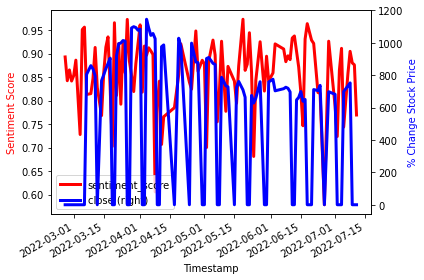

In [20]:
import matplotlib.pyplot as plt

ax1 = dfSentiment.plot(kind = 'line', x = 'timestamp',
                  y = 'sentiment_score', color = 'Red',
                  linewidth = 3)

ax2 = dfSentiment.plot(kind = 'line', x = 'timestamp',
                   y = 'close', secondary_y = True,
                   color = 'Blue',  linewidth = 3,
                   ax = ax1) 

#labeling x and y-axis
ax1.set_xlabel('Timestamp', color = 'black')
ax1.set_ylabel('Sentiment Score', color = "r")
ax2.set_ylabel('% Change Stock Price', color = 'b')
 
#defining display layout
plt.tight_layout()
 
#show plot
plt.show()